# Decision Trees

In [26]:
# importing libraries
import pandas as pd

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import matplotlib.pyplot as plt
%matplotlib inline

#from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

# for visualisation
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [27]:
# importing the dataset
titanic = pd.read_csv('Titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
titanic.dropna(inplace = True)

In [29]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

Change 'Sex' column to be binary 0 or 1 instead of string.

In [30]:
titanic['Sex'] = titanic['Sex'].replace('female', 0)
titanic['Sex'] = titanic['Sex'].replace('male', 1)
titanic['Sex'] = titanic['Sex'].astype('category')


We must also change the embarked column in the same way.

In [31]:
titanic['Embarked'].unique()

array(['C', 'S', 'Q'], dtype=object)

In [32]:
titanic['Embarked'] = titanic['Embarked'].replace('C', 0)
titanic['Embarked'] = titanic['Embarked'].replace('S', 1)
titanic['Embarked'] = titanic['Embarked'].replace('Q', 2)
titanic['Embarked'] = titanic['Embarked'].astype('category')

In [33]:
titanic.dtypes

PassengerId       int64
Survived          int64
Pclass            int64
Name             object
Sex            category
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked       category
dtype: object

In [34]:
X = titanic.iloc[:, [2,4,5,6,7,9,11]]
X.shape

(183, 7)

In [35]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,0,38.0,1,0,71.2833,0
3,1,0,35.0,1,0,53.1000,1
6,1,1,54.0,0,0,51.8625,1
10,3,0,4.0,1,1,16.7000,1
11,1,0,58.0,0,0,26.5500,1
...,...,...,...,...,...,...,...
871,1,0,47.0,1,1,52.5542,1
872,1,1,33.0,0,0,5.0000,1
879,1,0,56.0,0,1,83.1583,0
887,1,0,19.0,0,0,30.0000,1


In [36]:
y = titanic.iloc[:, 1]
y.shape

(183,)

In [37]:
y

1      1
3      1
6      0
10     1
11     1
      ..
871    1
872    0
879    1
887    1
889    1
Name: Survived, Length: 183, dtype: int64

Split into training, test and validation sets.

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, shuffle = True)
# this creates our training set, and keeps the remaining 20% in one set to be used as both test and validation.


Now train a base and bagged model. 

In [39]:
model = DecisionTreeClassifier(max_depth = 6) 
'''It is shown later in the exercise that this is the optimal depth 
for this model. I have left this above that part in order to make things easier 
for you to mark as it follows the order of the task more this way. '''
ensemble = BaggingClassifier(base_estimator = model, n_estimators = 100, random_state = 7)


model.fit(X_train,y_train)
ensemble.fit(X_train,y_train)

print("Accuracy base:",model.score(X_test, y_test))
print("Accuracy ensemble:",ensemble.score(X_test, y_test))

Accuracy base: 0.6756756756756757
Accuracy ensemble: 0.7027027027027027


Next create a random forest.

In [40]:
forest = RandomForestClassifier(n_estimators=80, random_state=7)
forest.fit(X_train, y_train)

print("Accuracy forest:", forest.score(X_test, y_test))

Accuracy forest: 0.7297297297297297


In [41]:
boosted_tree = AdaBoostClassifier(n_estimators = 80, random_state = 7)

boosted_tree.fit(X_train, y_train)

print("Accuracy boosted tree:", boosted_tree.score(X_test, y_test))

Accuracy boosted tree: 0.7027027027027027


Now using the forest model, determine which factor was the most influencial in deciding if a passengers survived the titanic tragedy or not.

In [42]:
feature_imp = pd.Series(forest.feature_importances_).sort_values(ascending=False)
feature_imp

5    0.309660
2    0.302107
1    0.228087
4    0.047086
3    0.044477
6    0.036819
0    0.031764
dtype: float64

In [43]:
titanic.iloc[:, 2]

1      1
3      1
6      1
10     3
11     1
      ..
871    1
872    1
879    1
887    1
889    1
Name: Pclass, Length: 183, dtype: int64

From feature_importances_ we can see the column at index 2 was the most influencial. and using iloc we can see that this is the passenger class. This makes sense from what we know logically about the accident. The richer passengers with the higher class tickets fared better than the working class passengers who were located deeper into the ship.


## Pick one of the models, and tune it for n_estimators and max_depth. 

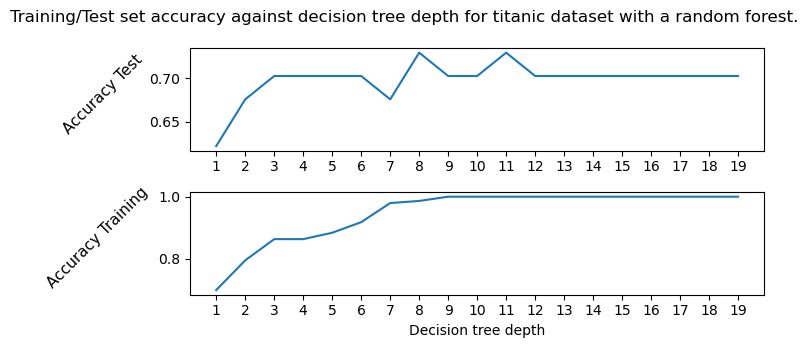

 Best prediction for the random forest happens at max depth of 8. Now to repeat for the n_estimators.


In [61]:
depth_range = range(1, 20)
training_scores = []
test_scores = []
for n in depth_range:
    clf = RandomForestClassifier(max_depth = n, n_estimators = 100, random_state = 7)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    training_scores.append(train_score)
    test_score = clf.score(X_test, y_test)
    test_scores.append(test_score)
    

fig, axs = plt.subplots(2)
axs[0].plot(depth_range, test_scores)
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
ax = plt.GridSpec(2, 2)
ax.update(wspace=0.5, hspace=0.5)
plt.xlabel("Decision tree depth")
axs[0].xaxis.set_ticks(depth_range)
fig.suptitle('Training/Test set accuracy against decision tree depth for titanic dataset with a random forest.')
plt.subplots_adjust(bottom=0.5, right=0.5, top=0.9)
axs[1].plot(depth_range, training_scores)
axs[1].xaxis.set_ticks(depth_range)
axs[0].set_ylabel('Accuracy Test', rotation=45, fontsize = 11, labelpad=30)
axs[1].set_ylabel('Accuracy Training', rotation = 45, fontsize = 11, labelpad = 40)
plt.show()

max_value = max(test_scores)
index = test_scores.index(max_value)
print(f" Best prediction for the random forest happens at max depth of {index + 1}. Now to repeat for the n_estimators.")

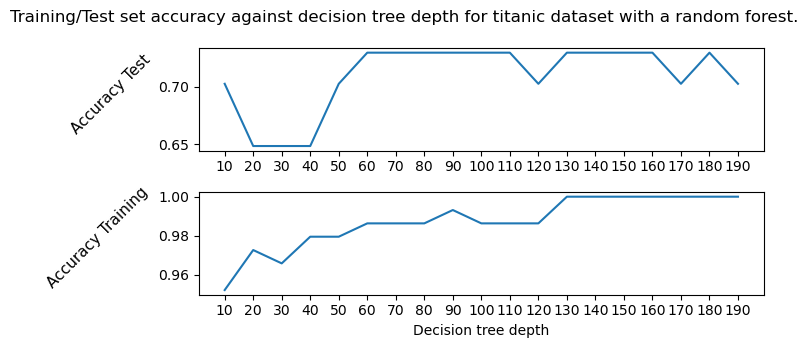

 Best prediction for the random forest happens at max depth of 60. 

Classification report for Random Forest

              precision    recall  f1-score   support

           0       0.62      0.57      0.59        14
           1       0.75      0.78      0.77        23

    accuracy                           0.70        37
   macro avg       0.68      0.68      0.68        37
weighted avg       0.70      0.70      0.70        37

Confusion matrix

[[ 8  6]
 [ 5 18]]

Accuracy score
0.7027027027027027


In [68]:
n_estimators_range = range(10, 200, 10)
training_scores = []
test_scores = []
for n in n_estimators_range:
    clf = RandomForestClassifier(max_depth = index + 1, n_estimators = n , random_state = 7)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    training_scores.append(train_score)
    test_score = clf.score(X_test, y_test)
    test_scores.append(test_score)
    

fig, axs = plt.subplots(2)
axs[0].plot(n_estimators_range, test_scores)
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
ax = plt.GridSpec(2, 2)
ax.update(wspace=0.5, hspace=0.5)
plt.xlabel("Decision tree depth")
axs[0].xaxis.set_ticks(n_estimators_range)
fig.suptitle('Training/Test set accuracy against decision tree depth for titanic dataset with a random forest.')
plt.subplots_adjust(bottom=0.5, right=0.5, top=0.9)
axs[1].plot(n_estimators_range, training_scores)
axs[1].xaxis.set_ticks(n_estimators_range)
axs[0].set_ylabel('Accuracy Test', rotation=45, fontsize = 11, labelpad=30)
axs[1].set_ylabel('Accuracy Training', rotation = 45, fontsize = 11, labelpad = 40)
plt.show()

max_value = max(test_scores)
estimators = test_scores.index(max_value)
print(f" Best prediction for the random forest happens at max depth of {n_estimators_range[estimators]}. ")


#Evaluate the model
print("\nClassification report for Random Forest\n")
print(classification_report(y_test, y_pred))
print("Confusion matrix\n")
print(confusion_matrix(y_test, y_pred))
print("\nAccuracy score")
print(accuracy_score(y_test, y_pred))

Now using these values I will refit all the models to see which performs best. 

In [70]:
model = DecisionTreeClassifier(max_depth = index + 1) 

ensemble = BaggingClassifier(base_estimator = model, n_estimators = rf_best.n_estimators, random_state = 7)


model.fit(X_train,y_train)
ensemble.fit(X_train,y_train)
forest = RandomForestClassifier(n_estimators=rf_best.n_estimators, random_state=7)
forest.fit(X_train, y_train)

boosted_tree = AdaBoostClassifier(n_estimators = rf_best.n_estimators, random_state = 7)
boosted_tree.fit(X_train, y_train)

print("Accuracy base:",model.score(X_test, y_test))
print("Accuracy ensemble:",ensemble.score(X_test, y_test))
print("Accuracy random forest:", forest.score(X_test, y_test))
print("Accuracy boosted forest:", boosted_tree.score(X_test, y_test))

Accuracy base: 0.6216216216216216
Accuracy ensemble: 0.7027027027027027
Accuracy random forest: 0.7027027027027027
Accuracy boosted forest: 0.7027027027027027
